In [2]:
!pip install yfinance


  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=bdab46bac13d18db0abb378bd9df4d0e93ffdc0a113983ed54e4a61619d220b0
  Stored in directory: /Users/roshnigulati/Library/Caches/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

sp500

In [45]:
sp500.index

DatetimeIndex(['1993-12-14', '1993-12-15', '1993-12-16', '1993-12-17',
               '1993-12-20', '1993-12-21', '1993-12-22', '1993-12-23',
               '1993-12-27', '1993-12-28',
               ...
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26'],
              dtype='datetime64[ns]', name='Date', length=7165, freq=None)

<AxesSubplot:xlabel='Date'>

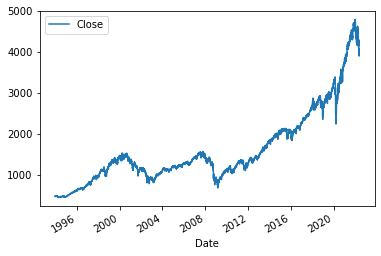

In [46]:
sp500.plot.line(y="Close", use_index=True)

del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088,1


In [18]:
sp500 = sp500.loc["1990-01-01":].copy()

In [19]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088,1


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]

test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [27]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [28]:
precision_score(test["Target"], preds)

0.43820224719101125

In [29]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

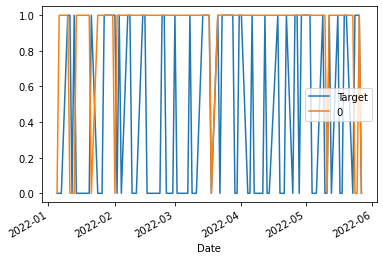

In [30]:
combined.plot()

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
        

In [32]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i: (i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(sp500, model, predictors)

In [34]:
predictions["Predictions"].value_counts()

0    3322
1    2344
Name: Predictions, dtype: int64

In [35]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5354095563139932

In [36]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.537063
0    0.462937
Name: Target, dtype: float64

In [37]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons: 
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/ rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [38]:
sp500 = sp500.dropna()

In [39]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,3973.750000,1,1.000073,1.0,0.984064,2.0,0.906629,27.0,0.879830,132.0,1.129182,553.0
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0,1.009192,2.0,1.004059,3.0,0.924923,27.0,0.896335,132.0,1.149726,553.0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1,0.995923,1.0,1.003378,2.0,0.918954,27.0,0.889264,131.0,1.139996,552.0


In [40]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [41]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [42]:
predictions = backtest(sp500, model, new_predictors)

In [43]:
predictions["Predictions"].value_counts()

0.0    3872
1.0     793
Name: Predictions, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5737704918032787